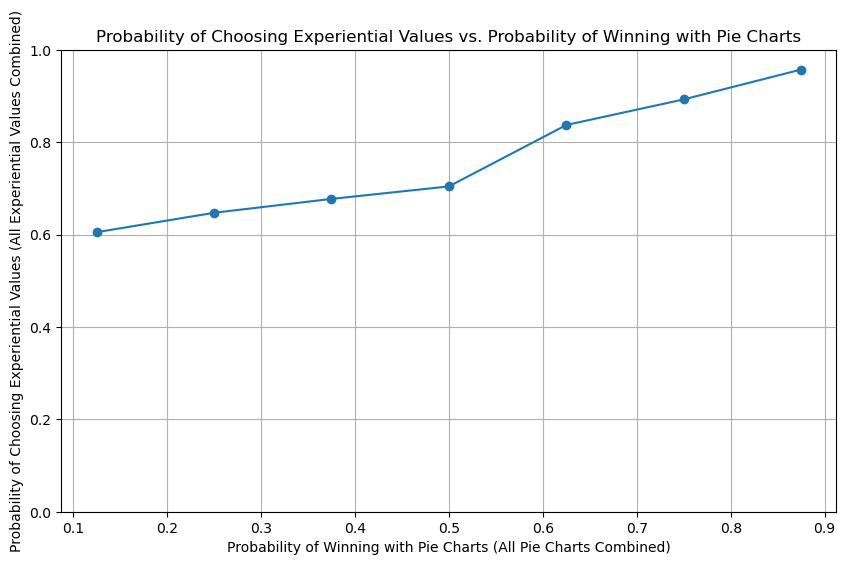

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

df_filtered = df[['left_probabilityEXP2', 'right_probabilityEXP2', 'selected_probabilityEXP2']]

probability_values = [0.125, 0.250, 0.375, 0.500, 0.625, 0.750, 0.875]

combined_probabilities = []
probabilities_experiential = []

for prob in probability_values:
    total_count = len(df_filtered[(df_filtered['left_probabilityEXP2'] == prob) | (df_filtered['right_probabilityEXP2'] == prob)])
    experiential_count = len(df_filtered[(df_filtered['left_probabilityEXP2'] == prob) | (df_filtered['right_probabilityEXP2'] == prob) & (df_filtered['selected_probabilityEXP2'] == prob)])
    
    combined_probability = prob
    probability_experiential = experiential_count / total_count if total_count > 0 else 0
    
    combined_probabilities.append(combined_probability)
    probabilities_experiential.append(probability_experiential)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(combined_probabilities, probabilities_experiential, marker='o', linestyle='-')
plt.xlabel('Probability of Winning with Pie Charts (All Pie Charts Combined)')
plt.ylabel('Probability of Choosing Experiential Values (All Experiential Values Combined)')
plt.title('Probability of Choosing Experiential Values vs. Probability of Winning with Pie Charts')
plt.grid(True)
plt.ylim(0, 1)
plt.show()


In [3]:
import pandas as pd


# experiential images and pie images 
experiential_image = ["'Cycle'", "'Menu'", "'Intersection'", "'Fire'", "'Mark'", "'Magnet'"]
Pie_image = ["'Pie1'", "'Pie2'", "'Pie3'", "'Pie4'"]

count_experiential_chosen = 0

count_total_0_125 = 0

for index, row in df.iterrows():
    if row['left_probabilityEXP2'] == 0.125 and row['left_imagesEXP2'] in Pie_image:
        count_total_0_125 += 1
        if row['selected_imageEXP2'] in experiential_image:
            count_experiential_chosen += 1
    elif row['right_probabilityEXP2'] == 0.125 and row['right_imagesEXP2'] in Pie_image:
        count_total_0_125 += 1
        if row['selected_imageEXP2'] in experiential_image:
            count_experiential_chosen += 1

# probability of choosing an experiential image when pie probability is 0.125
if count_total_0_125 > 0:
    probability_experiential_chosen = count_experiential_chosen / count_total_0_125
    print(f"Probability of choosing an experiential image when pie probability is 0.125: {probability_experiential_chosen}")



Probability of choosing an experiential image when pie probability is 0.125: 0.9291666666666667


Probability 0.125: Probability of choosing an experiential image: 0.9291666666666667
Probability 0.25: Probability of choosing an experiential image: 0.8491666666666666
Probability 0.375: Probability of choosing an experiential image: 0.8008333333333333
Probability 0.5: Probability of choosing an experiential image: 0.5733333333333334
Probability 0.625: Probability of choosing an experiential image: 0.35583333333333333
Probability 0.75: Probability of choosing an experiential image: 0.19333333333333333
Probability 0.875: Probability of choosing an experiential image: 0.1025


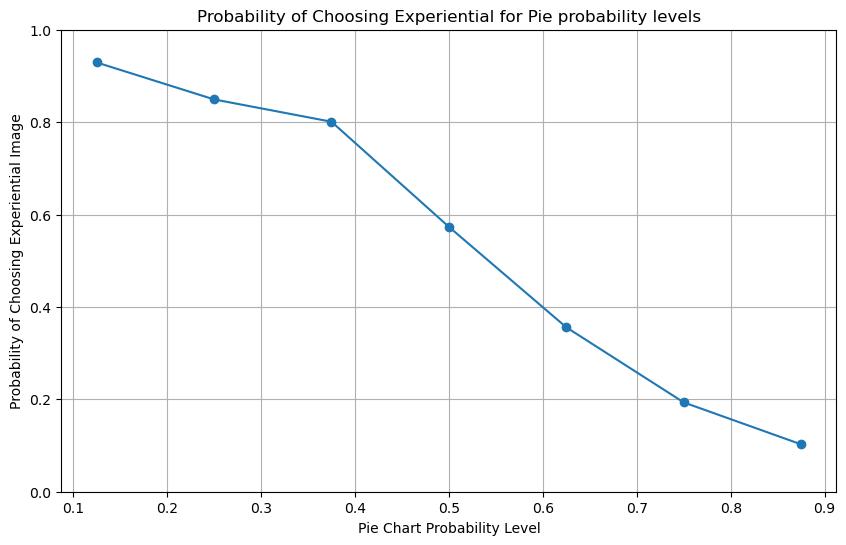

In [4]:
import pandas as pd


selected_probabilities = [0.125, 0.250, 0.375, 0.500, 0.625, 0.750, 0.875]

#dictionary to store results
results = {}
#probabilities = []
#labels = []

for probability in selected_probabilities:
    count_experiential_chosen = 0
    count_total_probability = 0
    
    for index, row in df.iterrows():
        if row['left_probabilityEXP2'] == probability and row['left_imagesEXP2'] in Pie_image:
            count_total_probability += 1
            if row['selected_imageEXP2'] in experiential_image:
                count_experiential_chosen += 1
        elif row['right_probabilityEXP2'] == probability and row['right_imagesEXP2'] in Pie_image:
            count_total_probability += 1
            if row['selected_imageEXP2'] in experiential_image:
                count_experiential_chosen += 1

    #probability of choosing experiential image for this currently given probability level
    if count_total_probability > 0:
        probability_experiential_chosen = count_experiential_chosen / count_total_probability
        results[probability] = probability_experiential_chosen
    else:
        results[probability] = 0

for probability, result in results.items():
    print(f"Probability {probability}: Probability of choosing an experiential image: {result}")

# lists for x and y values to plot
x_values = selected_probabilities
y_values = [results[probability] for probability in selected_probabilities]

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o')
plt.xlabel('Pie Chart Probability Level')
plt.ylabel('Probability of Choosing Experiential Image')
plt.title('Probability of Choosing Experiential for Pie probability levels')
plt.grid(True)
plt.ylim(0, 1)
plt.show()

Probability 0.125: Probability of choosing a pie image: 0.6764285714285714
Probability 0.25: Probability of choosing a pie image: 0.5807142857142857
Probability 0.375: Probability of choosing a pie image: 0.5578571428571428
Probability 0.625: Probability of choosing a pie image: 0.37785714285714284
Probability 0.75: Probability of choosing a pie image: 0.33714285714285713
Probability 0.875: Probability of choosing a pie image: 0.20857142857142857


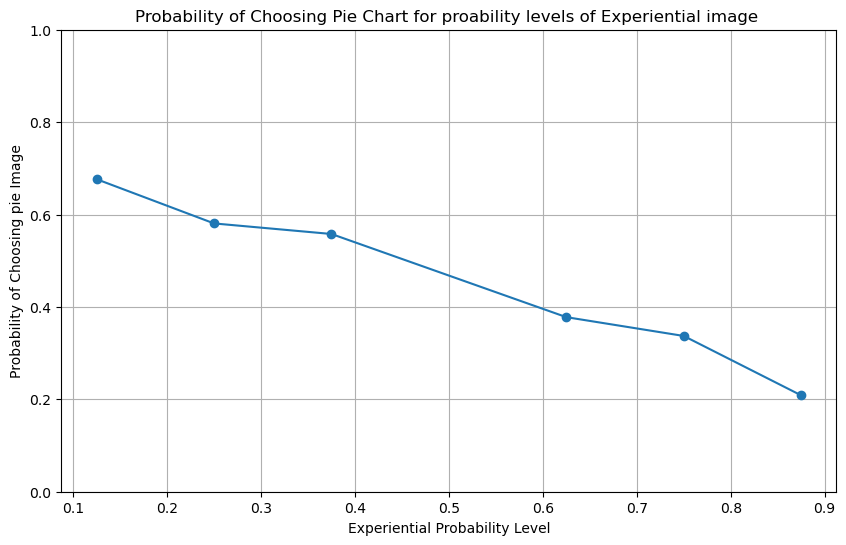

In [8]:
# Excluding p===0.5 as this doesn't exist for experiential images
selected_probabilities = [0.125, 0.250, 0.375, 0.625, 0.750, 0.875]

results = {}

for probability in selected_probabilities:
    count_pie_chosen = 0
    count_total_probability = 0
    
    for index, row in df.iterrows():
        # does left or right side have an exp.icon with the current prob. level???
        if row['left_probabilityEXP2'] == probability and row['left_imagesEXP2'] in experiential_image:
            count_total_probability += 1
            if row['selected_imageEXP2'] in Pie_image:
                count_pie_chosen += 1
        elif row['right_probabilityEXP2'] == probability and row['right_imagesEXP2'] in experiential_image:
            count_total_probability += 1
            if row['selected_imageEXP2'] in Pie_image:
                count_pie_chosen += 1

    # probability of choosing an pie image for this probability level
    if count_total_probability > 0:
        probability_pie_chosen = count_pie_chosen / count_total_probability
        results[probability] = probability_pie_chosen
    else:
        results[probability] = 0

for probability, result in results.items():
    print(f"Probability {probability}: Probability of choosing a pie image: {result}")

# lists for x and y values for the plot
x_values = selected_probabilities
y_values = [results[probability] for probability in selected_probabilities]
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o')
plt.xlabel('Experiential Probability Level')
plt.ylabel('Probability of Choosing pie Image')
plt.title('Probability of Choosing Pie Chart for proability levels of Experiential image ')
plt.grid(True)
plt.ylim(0, 1)

plt.show()

In [10]:
import pandas as pd


# pie probabilities and experiential image probabilities
pie_probabilities = [0.125, 0.250, 0.375, 0.625, 0.750, 0.875]

for pie_prob in pie_probabilities:
    count_experiential_chosen = 0

    # count for the total number of rows where both pie prob. and experiential image prob. match the current level
    count_total_matched = 0

    # 1. do left and right sides have pie charts with the current pie probability
    # 2. is the selected image in the experiential_image list

    for index, row in df.iterrows():
        if row['left_probabilityEXP2'] == pie_prob and row['right_probabilityEXP2'] == pie_prob:
            count_total_matched += 1
            if row['selected_imageEXP2'] in experiential_image:
                count_experiential_chosen += 1

    # probability of choosing an experiential image for the current probability combination
    if count_total_matched > 0:
        probability_experiential_chosen = count_experiential_chosen / count_total_matched
        print(f"Probability of choosing an experiential image when both pie probability and experiential image probability are {pie_prob}: {probability_experiential_chosen}")
    


Probability of choosing an experiential image when both pie probability and experiential image probability are 0.125: 0.815
Probability of choosing an experiential image when both pie probability and experiential image probability are 0.25: 0.775
Probability of choosing an experiential image when both pie probability and experiential image probability are 0.375: 0.74
Probability of choosing an experiential image when both pie probability and experiential image probability are 0.625: 0.425
Probability of choosing an experiential image when both pie probability and experiential image probability are 0.75: 0.275
Probability of choosing an experiential image when both pie probability and experiential image probability are 0.875: 0.35


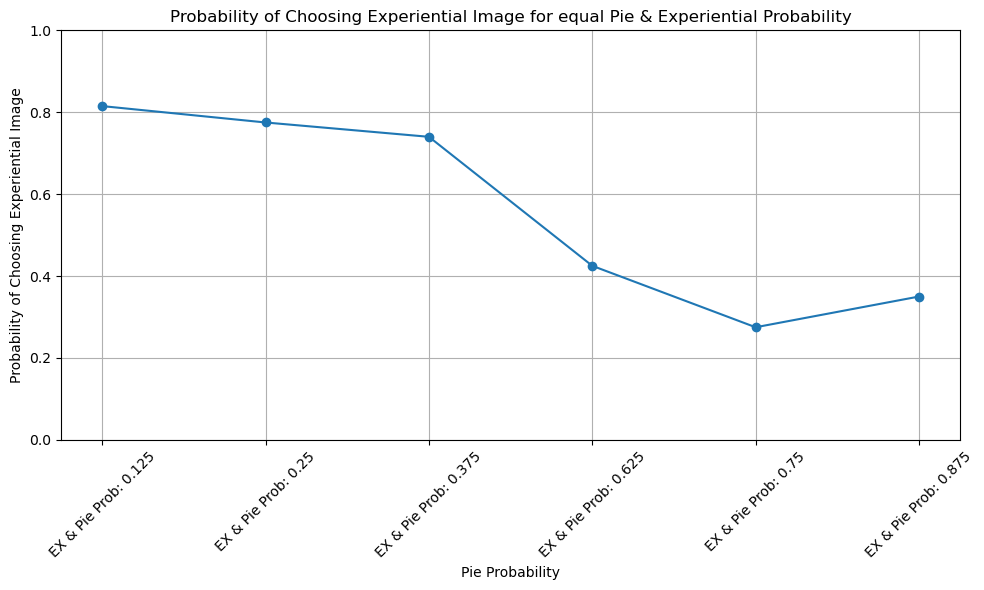

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


probabilities = []
labels = []

for pie_prob in pie_probabilities:
    count_experiential_chosen = 0

    # count for the total number of rows where both pie prob. and experiential image prob. match the current level
    count_total_matched = 0

    # 1. do left and right sides have pie charts with the current pie probability
    # 2. is the selected image in the experiential_image list

    for index, row in df.iterrows():
        if row['left_probabilityEXP2'] == pie_prob and row['right_probabilityEXP2'] == pie_prob:
            count_total_matched += 1
            if row['selected_imageEXP2'] in experiential_image:
                count_experiential_chosen += 1

    # probability of choosing an experiential image for the current probability combination
    if count_total_matched > 0:
        probability_experiential_chosen = count_experiential_chosen / count_total_matched
        probabilities.append(probability_experiential_chosen)
        labels.append(f"EX & Pie Prob: {pie_prob}")
# line plot   
plt.figure(figsize=(10, 6))
plt.plot(labels, probabilities, marker='o', linestyle='-')
plt.xlabel('Pie Probability')
plt.ylabel('Probability of Choosing Experiential Image')
plt.title('Probability of Choosing Experiential Image for equal Pie & Experiential Probability')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


Probability of choosing pie chart when both pie probability and experiential image probability are 0.125: 0.185
Probability of choosing pie chart when both pie probability and experiential image probability are 0.25: 0.225
Probability of choosing pie chart when both pie probability and experiential image probability are 0.375: 0.26
Probability of choosing pie chart when both pie probability and experiential image probability are 0.625: 0.575
Probability of choosing pie chart when both pie probability and experiential image probability are 0.75: 0.725
Probability of choosing pie chart when both pie probability and experiential image probability are 0.875: 0.65


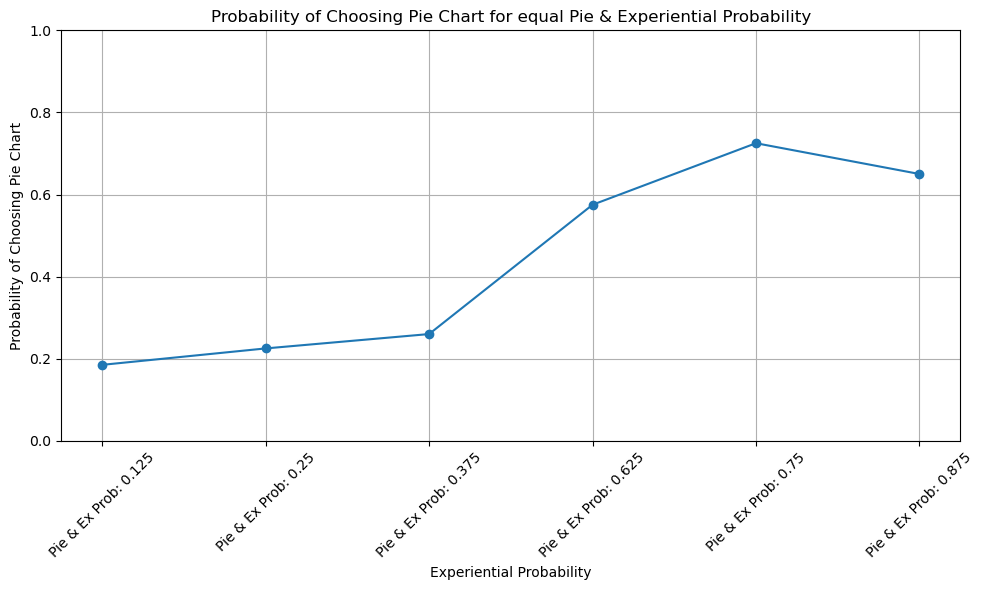

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# prob. for choosing pie chart when    pie.prob. = exp.prob
probabilities = []
labels = []

for pie_prob in pie_probabilities:
    count_pie_chosen = 0
    count_total_matched = 0

    # 1. do left and right sides have pie charts with the current pie probability
    # 2. is the selected image in the Pie_image list

    for index, row in df.iterrows():
        if row['left_probabilityEXP2'] == pie_prob and row['right_probabilityEXP2'] == pie_prob:
            count_total_matched += 1
            if row['selected_imageEXP2'] in Pie_image:
                count_pie_chosen += 1

    if count_total_matched > 0:
        probability_pie_chosen = count_pie_chosen / count_total_matched
        print(f"Probability of choosing pie chart when both pie probability and experiential image probability are {pie_prob}: {probability_pie_chosen}")

        probabilities.append(probability_pie_chosen)
        labels.append(f"Pie & Ex Prob: {pie_prob}")
    
plt.figure(figsize=(10, 6))
plt.plot(labels, probabilities, marker='o', linestyle='-')
plt.xlabel('Experiential Probability')
plt.ylabel('Probability of Choosing Pie Chart')
plt.title('Probability of Choosing Pie Chart for equal Pie & Experiential Probability')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()
